# Download Dataset from Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 kaggle.json

In [ ]:
! kaggle datasets download -d ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text

  0% 0.00/814k [00:00<?, ?B/s]
100% 814k/814k [00:00<00:00, 55.4MB/s]


In [ ]:
! unzip indonesian-abusive-and-hate-speech-twitter-text.zip

Archive:  indonesian-abusive-and-hate-speech-twitter-text.zip
  inflating: README.md               
  inflating: abusive.csv             
  inflating: citation.bib            
  inflating: data.csv                
  inflating: new_kamusalay.csv       


# Dataset Preparation

In [ ]:
import pandas as pd

## Abusive Twitter Dataset

In [ ]:
twitter_dataset = pd.read_csv('data.csv', encoding = 'latin-1')

In [ ]:
twitter_dataset.head(10)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
twitter_dataset.rename(columns = {'Tweet': 'text', 'Abusive': 'bad_word'}, inplace = True)
twitter_dataset = twitter_dataset[['text', 'bad_word']]

In [ ]:
twitter_dataset['bad_word'].value_counts()

0    8126
1    5043
Name: bad_word, dtype: int64

## Instagram Comment Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_komentar_instagram_cyberbullying.csv'
ig_dataset = pd.read_csv(url)

In [ ]:
ig_dataset.head(10)

,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
5,6,negative,"Pantesan di tinggalin laki, ya lakinya juga mi..."
6,7,negative,kebiasaan balajaer nyampah d ig para artis..su...
7,8,negative,krn sebagian besar rakyat indonesia itu bodoh....
8,9,negative,ayu janda bego pny suami kpn nikah laginya?
9,10,negative,"Anyiennnnggg.. Suaranya ancur banget, lebih me..."


In [ ]:
ig_dataset.drop(columns = 'Id', inplace = True)
ig_dataset.rename(columns = {'Instagram Comment Text': 'text'}, inplace = True)

ig_dataset['bad_word'] = (ig_dataset['Sentiment'] == 'negative').astype(int)
ig_dataset.drop(columns = 'Sentiment', inplace = True)

In [ ]:
ig_dataset['bad_word'].value_counts()

1    200
0    200
Name: bad_word, dtype: int64

## Merging Datasets

In [ ]:
dataset = pd.concat([twitter_dataset, ig_dataset], ignore_index = True)

In [ ]:
dataset['bad_word'].value_counts()

0    8326
1    5243
Name: bad_word, dtype: int64

# Data Preprocessing

## Load Non-Standard Word Dictionary

In [ ]:
non_standard_word_dict = pd.read_csv('new_kamusalay.csv', encoding = 'latin-1', header = None)
non_standard_word_dict = non_standard_word_dict.rename(columns = {0: 'non_standard', 1: 'standard'})

In [ ]:
non_standard_word_dict.tail(10)

,non_standard,standard
15157,memengusir,mengusir
15158,menayukuri,mensyukuri
15159,menag,menteri agama
15160,menagama,menteri agama
15161,mendagri,menteri dalam negeri
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit
15166,megangin,memegang


## Download and Load Indonesian Stopword

In [ ]:
! kaggle datasets download -d oswinrh/indonesian-stoplist

  0% 0.00/2.27k [00:00<?, ?B/s]
100% 2.27k/2.27k [00:00<00:00, 3.53MB/s]


In [ ]:
! unzip indonesian-stoplist.zip

Archive:  indonesian-stoplist.zip
  inflating: stopwordbahasa.csv      


In [ ]:
stopword = pd.read_csv('stopwordbahasa.csv', header = None)
stopword = stopword.rename(columns = {0: 'stopword'})

In [ ]:
stopword.head(10)

,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak
5,agaknya
6,agar
7,akan
8,akankah
9,akhir


## Preprocessing

In [ ]:
import re

def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

def remove_unnecessary_char(text):
    text = re.sub(r'\\n', ' ', text)    # remove newline
    text = re.sub(r'\\r', ' ', text)    # remove carriage return
    text = re.sub('&amp', ' ', text)    # remove ampersand
    text = re.sub(r'\bRT\b', ' ', text)  # remove retweet symbol
    text = re.sub(r'\bUSER\b', ' ', text)    # remove username from twitter dataset
    text = re.sub(r'\bUSERNAME\b', '', text)   # remove username from instagram dataset
    text = re.sub(r'@[A-Za-z0-9_.]+', '', text)  # remove mention from instagram dataset
    text = re.sub(r'\burl\b', ' ', text, flags = re.I)  # remove URL word
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', ' ', text)  # remove URL
    text = re.sub(r'\\x..', '', text)    # remove hexadecimal character
    text = re.sub(r'  +', ' ', text) # remove extra spaces
    return text

def remove_duplicate_last_letter_helper(word):
    if len(word) <= 1:
        return word
    if word[-1] == word[-2] and word[-1].isalpha():
        return  remove_duplicate_last_letter_helper(word[:-1])
    else:
        return word

def remove_duplicate_last_letter(text):
    return ' '.join([remove_duplicate_last_letter_helper(word) for word in text.split(' ')])
    
non_standard_word_map = dict(zip(non_standard_word_dict['non_standard'], non_standard_word_dict['standard']))
def normalize_word(text):
    return ' '.join([non_standard_word_map[word] if word in non_standard_word_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in stopword['stopword'].values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # remove extra spaces
    text = text.strip()
    return text

def preprocess(text):
    text = remove_unnecessary_char(text)
    text = remove_nonaplhanumeric(text)
    text = text.strip()
    text = text.lower()
    text = remove_duplicate_last_letter(text)
    text = normalize_word(text)
    text = remove_stopword(text)
    return text

In [ ]:
dataset['text'] = dataset['text'].apply(preprocess)

In [ ]:
dataset.drop_duplicates(inplace = True)

In [ ]:
dataset.head(10)

,text,bad_word
0,cowok berusaha melacak perhatian gue lantas re...,1
1,telat tau edan sarap gue bergaul cigax jifla c...,1
2,41 kadang berpikir percaya tuhan jatuh berkali...,0
3,ku tau matamu sipit,0
4,kaum cebong kafir dongoknya dungu haha,1
5,ya bani taplak dk,1
6,deklarasi pilihan kepala daerah 2018 aman anti...,0
7,gue selesai re watch aldnoah zero kampret 2 ka...,1
8,admin belanja port terbaik nak makan ais kepal...,0
9,enak ngewe,1


In [ ]:
dataset['bad_word'].value_counts()

0    8084
1    5016
Name: bad_word, dtype: int64

In [ ]:
dataset.to_csv('dataset_v2.csv', index = False)

# Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split dataset to training (80%), validation (10%), and test (10%) set
x_train, x_test, y_train, y_test = train_test_split(dataset['text'], dataset['bad_word'], test_size = 0.2, stratify = dataset['bad_word'], random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, stratify = y_test, random_state = 42)

# Building Model

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

print("\u2022 Using TensorFlow Version:", tf.__version__)

• Using TensorFlow Version: 2.5.0


## Load Pretrained 128-Dimensional Embedding

In [ ]:
embedding = hub.load("https://tfhub.dev/google/tf2-preview/nnlm-id-dim128-with-normalization/1")
hub_layer = hub.KerasLayer(embedding, input_shape = [], dtype = tf.string, trainable = True)

## Training

In [ ]:
model_lstm = tf.keras.Sequential([
        hub_layer,
        tf.keras.layers.Reshape(target_shape = (128, 1)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(16, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')])

model_lstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 128)               112461824 
_________________________________________________________________
reshape_5 (Reshape)          (None, 128, 1)            0         
_________________________________________________________________
bidirectional_25 (Bidirectio (None, 128, 128)          33792     
_________________________________________________________________
bidirectional_26 (Bidirectio (None, 128, 128)          98816     
_________________________________________________________________
bidirectional_27 (Bidirectio (None, 128, 128)          98816     
_________________________________________________________________
bidirectional_28 (Bidirectio (None, 128, 128)          98816     
_________________________________________________________________
bidirectional_29 (Bidirectio (None, 128)              

In [ ]:
history_lstm = model_lstm.fit(x_train, y_train, epochs = 20, validation_data = (x_val, y_val))

Epoch 1/20
328/328 [==============================] - 42s 95ms/step - loss: 0.3665 - accuracy: 0.8406 - val_loss: 0.2672 - val_accuracy: 0.8924
Epoch 2/20
328/328 [==============================] - 28s 86ms/step - loss: 0.1425 - accuracy: 0.9506 - val_loss: 0.2550 - val_accuracy: 0.9053
Epoch 3/20
328/328 [==============================] - 28s 86ms/step - loss: 0.0759 - accuracy: 0.9754 - val_loss: 0.4336 - val_accuracy: 0.8626
Epoch 4/20
328/328 [==============================] - 28s 86ms/step - loss: 0.0548 - accuracy: 0.9823 - val_loss: 0.3257 - val_accuracy: 0.8924
Epoch 5/20
328/328 [==============================] - 28s 86ms/step - loss: 0.0447 - accuracy: 0.9858 - val_loss: 0.3655 - val_accuracy: 0.8832
Epoch 6/20
328/328 [==============================] - 28s 86ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.3822 - val_accuracy: 0.8916
Epoch 7/20
328/328 [==============================] - 28s 86ms/step - loss: 0.0258 - accuracy: 0.9930 - val_loss: 0.4654 - val_accuracy:

## Evaluation

In [ ]:
x_test = x_test.apply(preprocess)
eval_results_lstm = model_lstm.evaluate(x_test, y_test)

for metric, value in zip(model_lstm.metrics_names, eval_results_lstm):
    print(metric + ': {:.3}'.format(value))

41/41 [==============================] - 1s 28ms/step - loss: 0.8271 - accuracy: 0.8588
loss: 0.827
accuracy: 0.859


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_prediction):
    cm = confusion_matrix(y_true, y_prediction)
    sns.heatmap(cm, annot = True, fmt = 'g', cmap = 'Greens')

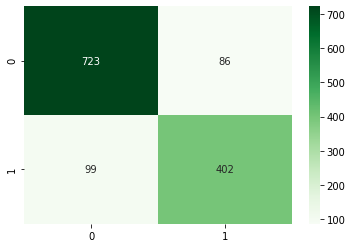

In [ ]:
THRESHOLD = 0.5

y_prediction = model_lstm.predict(x_test) > THRESHOLD
plot_confusion_matrix(y_test, y_prediction)

# Deployment

In [ ]:
model_lstm.save('lstm-128-v2')

INFO:tensorflow:Assets written to: lstm-128-v2/assets


INFO:tensorflow:Assets written to: lstm-128-v2/assets


In [ ]:
import sys

if 'google.colab' in sys.modules:
    from google.colab import auth as google_auth
    google_auth.authenticate_user()

## Create Cloud Storage Bucket

In [ ]:
REGION = ""
PROJECT_ID = ""
BUCKET_NAME = ""

In [ ]:
! gsutil mb -l $REGION -p $PROJECT_ID gs://$BUCKET_NAME

## Upload Model to Cloud Storage

In [ ]:
! gsutil -m cp -r ./lstm-128-v2 gs://$BUCKET_NAME

Copying file://./lstm-128-v2/saved_model.pb [Content-Type=application/octet-stream]...
Copying file://./lstm-128-v2/variables/variables.data-00000-of-00001 [Content-Type=application/octet-stream]...
Copying file://./lstm-128-v2/assets/tokens.txt [Content-Type=text/plain]...
Copying file://./lstm-128-v2/keras_metadata.pb [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil d

## Create AI Platform Model 

In [ ]:
MODEL_NAME = ""

In [ ]:
! gcloud ai-platform models create $MODEL_NAME \
    --region=$REGION \
    --project=$PROJECT_ID

## Create Model Version

In [ ]:
MODEL_DIR = "gs://{}/lstm-128-v2/".format(BUCKET_NAME)
VERSION_NAME = ""
MACHINE_TYPE = ""

In [ ]:
! gcloud ai-platform versions create $VERSION_NAME \
  --model=$MODEL_NAME \
  --origin=$MODEL_DIR \
  --runtime-version=2.4 \
  --framework=tensorflow \
  --python-version=3.7 \
  --region=$REGION \
  --machine-type=$MACHINE_TYPE \
  --project=$PROJECT_ID

## Send Prediction Request

In [ ]:
import json

texts = [
          "tanggal 1 juni diperingati sebagai hari pancasila.",
          "lama kali kau datang anjeng, dari mana aja kau?"
        ]

input = {"instances": [preprocess(text) for text in texts]}

with open('data.json', 'w') as outfile:
    json.dump(input, outfile)

In [ ]:
! gcloud ai-platform predict \
    --project=$PROJECT_ID \
    --model=$MODEL_NAME \
    --version=$VERSION_NAME \
    --json-request=data.json \
    --region=$REGION

Contoh Output:

```
Using endpoint [https://asia-southeast1-ml.googleapis.com/]
[[0.000398784876], [0.987283885]]
```